In [1]:
import sys
sys.path.insert(0, "../../src/")
from framework import *
from algorithms import pso

In [2]:
pso.load_best_instance('../../result/june.db')
save_handler = SaveHandlerJSON('../../result/june/')

ins = pso.best_instance
ins.trial.params

{'sigma0': 113309.15661751962, 'r': 0.4244414730860354, 'population_size': 938}

In [3]:
# ins.run(
#     save_handler=save_handler,
#     save_partial=False,
#     restart=True,
#     does_prune=False,
# )
ins.load_results(save_handler=save_handler, partial=False)

In [4]:
ins.performance_measures()


{'success_rate': 0,
 'failure_rate': 1,
 'success_cnt': 0,
 'avg_success_eval': inf,
 'hv': 0,
 'par2': inf,
 'par10': inf,
 'avg_height': 1245.241243194018,
 'ert': inf,
 'sp': inf,
 'success_rate_upper': 0,
 'success_rate_lower': 0,
 'success_rate_length': 0,
 'gary_ert': 27027.027027027027}

In [5]:
ins.performance_to_latex()

pso	& 20	& 0\%	& 1245	& \( +\infty \) 	& \(2.70 \times 10^{4}\) \\

In [6]:
ins.trial.params

{'sigma0': 113309.15661751962, 'r': 0.4244414730860354, 'population_size': 938}

In [7]:
ins.params_to_latex(int_fields=['population_size'])

& \texttt{sigma0} & \(1.13 \times 10^{5}\) \\
& \texttt{r} & \(4.24 \times 10^{-1}\) \\
& \texttt{population\_size} & 938 \\


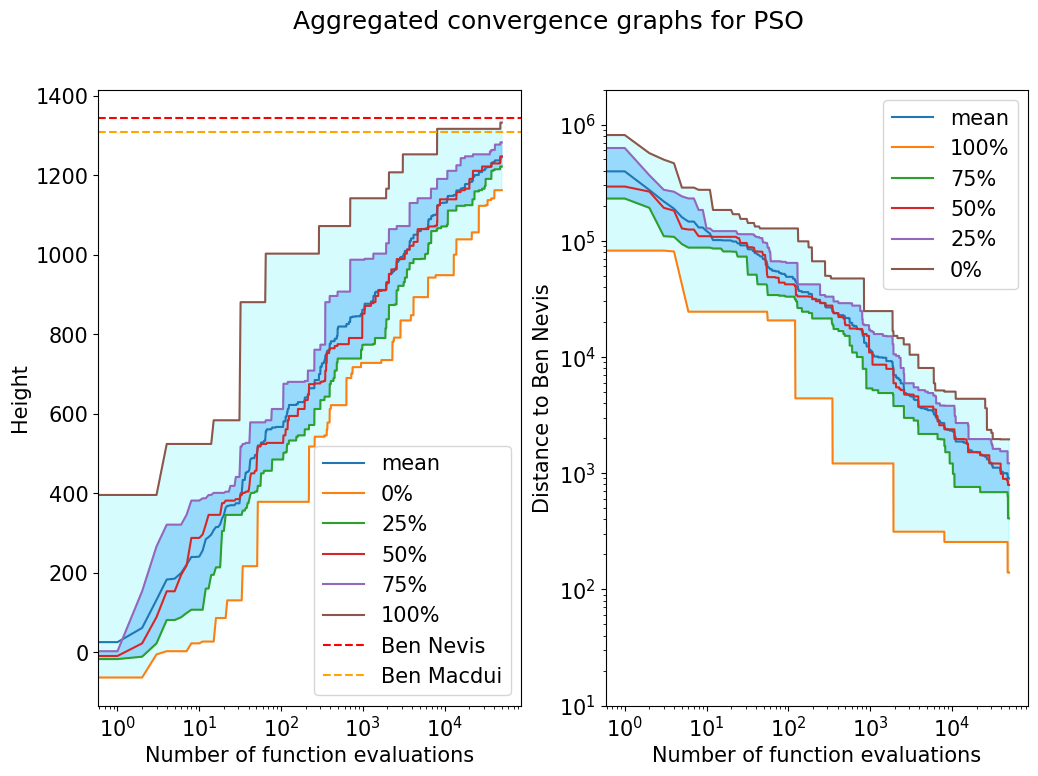

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
ins.algorithm.name = 'PSO'
ins.plot_convergence_graph(img_path='./imgs/agg-PSO.png')

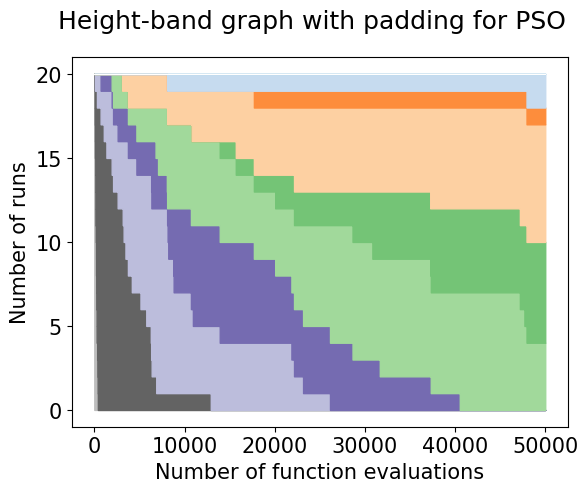

In [13]:
ins.plot_stacked_graph(img_path='./imgs/hbwp-PSO', with_legends=False)

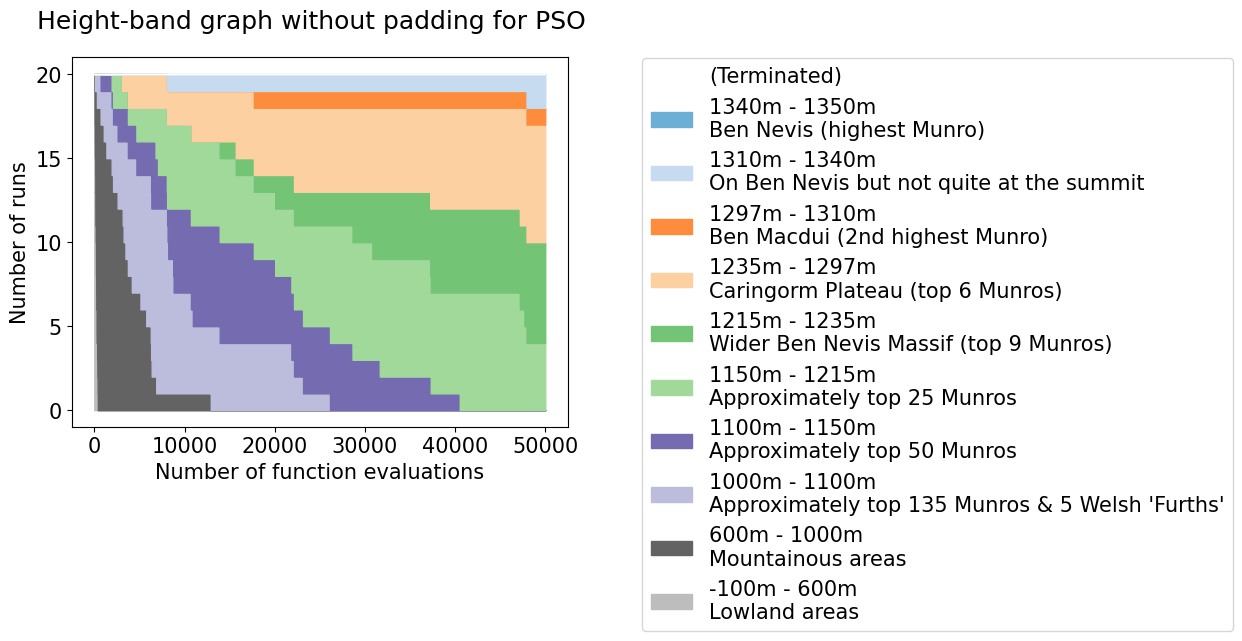

In [10]:
ins.plot_stacked_graph(mode='terminate', img_path='./imgs/hbwop-PSO')

A script that plots everything at once

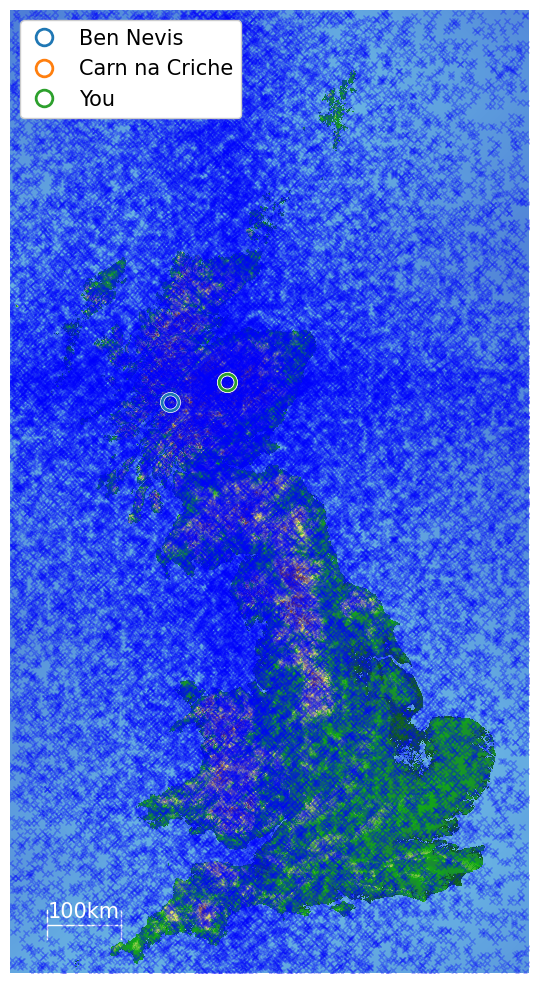

In [11]:
res = ins.results[4]
res.plot_global()

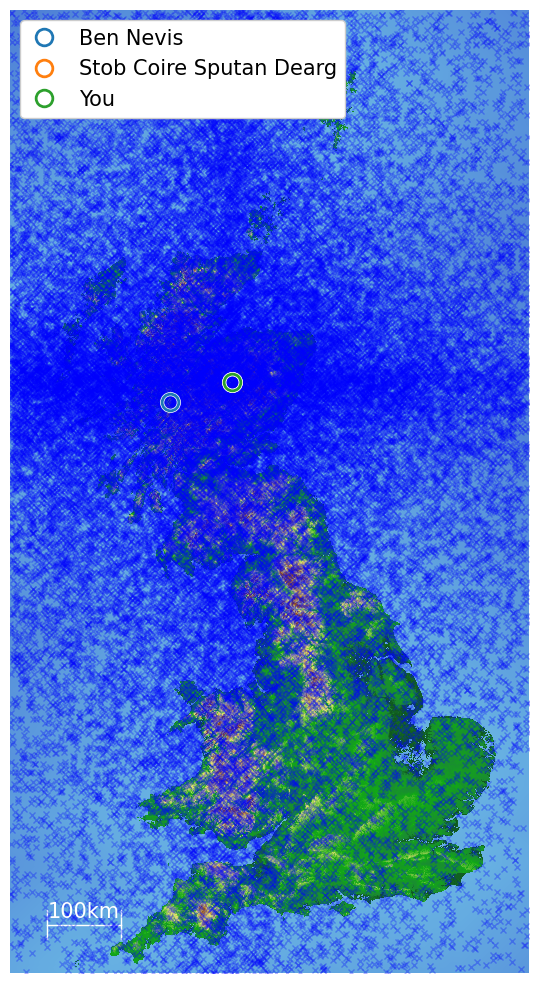

In [12]:
res = ins.results[3]
res.plot_global()